Michigan 2018 general election results by county downloaded from https://mielections.us/election/results/2018GEN_CENR.html#.

Data cleaned and manipulated to give Democratic vs Republican vote totals and percentages by Michigan state legislative district.

Michigan State House of Representatives Results (Democratic and Republican)

In [42]:
import pandas as pd
results = pd.read_csv(r"Data\2018GEN_MI_CENR_BY_COUNTY.csv",sep=",")

# slicing state house results section of the results
results_house = results.loc[results['OfficeCode(Text)'] == '8']

# header showing how existing data is structured
results_house.head(5)

,ElectionDate,OfficeCode(Text),DistrictCode(Text),StatusCode,CountyCode,CountyName,OfficeDescription,PartyOrder,PartyName,PartyDescription,CandidateID,CandidateLastName,CandidateFirstName,CandidateMiddleName,CandidateFormerName,CandidateVotes,WriteIn(W)/Uncommitted(Z),Recount(*),Nominated(N)/Elected(E)
3628,11/6/2018,8,100,0,82.0,WAYNE,1st District Representative in State Legislatu...,1.0,REP,Republican,518709.0,Corcoran,Mark,NaN,NaN,7466.0,NaN,NaN,NaN
3629,11/6/2018,8,100,0,82.0,WAYNE,1st District Representative in State Legislatu...,2.0,DEM,Democratic,518090.0,Yancey,Tenisha,NaN,NaN,21790.0,NaN,NaN,E
3630,11/6/2018,8,100,0,82.0,WAYNE,1st District Representative in State Legislatu...,3.0,LIB,Libertarian,518853.0,Creswell,Gregory,NaN,NaN,631.0,NaN,NaN,NaN
3631,11/6/2018,8,200,0,82.0,WAYNE,2nd District Representative in State Legislatu...,1.0,REP,Republican,518789.0,Palffy,John,NaN,NaN,7954.0,NaN,NaN,NaN
3632,11/6/2018,8,200,0,82.0,WAYNE,2nd District Representative in State Legislatu...,2.0,DEM,Democratic,517721.0,Tate,Joe,NaN,NaN,22060.0,NaN,NaN,E


In [43]:
# cleaning and reformatting data to simplify use
results_house = results_house[['DistrictCode(Text)' ,'CountyName' ,'PartyName' ,'CandidateLastName' ,'CandidateFirstName', 'CandidateVotes']]
results_house = results_house.rename(columns={'DistrictCode(Text)':'District'})
results_house['District'] = results_house['District'].str.replace("00",'')
results_house.at[(3906,3907,3908,3909,3910,3911),'District'] = 100
results_house['CandidateName'] = results_house['CandidateFirstName'] + " " + results_house['CandidateLastName']
results_house = results_house.drop(columns=['CandidateLastName','CandidateFirstName'])

# grouping results by district and party vote totals
grouped_results = results_house.groupby(by=['District','PartyName'])

# setting up new dataframe to store district totals
districts = range(1,111,1)
results_by_district = pd.DataFrame(districts,columns=['District'])
results_by_district = results_by_district.set_index(['District'])
results_by_district = results_by_district.reindex(columns=['DemVotes','RepVotes'])

# iterating over groups to fill the new dataframe
for key, group in grouped_results:
    if key[1] in ['GRN','LIB','NPA']:
        continue
    total = grouped_results.get_group(key)['CandidateVotes'].sum()
    if key[1] == 'DEM':
        results_by_district.at[int(key[0]),'DemVotes'] = total
    elif key[1] == 'REP':
        results_by_district.at[int(key[0]),'RepVotes'] = total
        
# calculating vote shares as percentage of 2 party
results_by_district['DemShare'] = results_by_district['DemVotes'] / (results_by_district['DemVotes']+results_by_district['RepVotes'])
results_by_district['RepShare'] = results_by_district['RepVotes'] / (results_by_district['DemVotes']+results_by_district['RepVotes'])
results_by_district['Difference'] = results_by_district['DemShare'] - results_by_district['RepShare']

# converting district index back to column for join
results_by_district = results_by_district.reset_index()

# showing new dataframe with vote totals and %s
print(results_by_district)

     District  DemVotes  RepVotes  DemShare  RepShare  Difference
0           1   21790.0    7466.0  0.744804  0.255196    0.489609
1           2   22060.0    7954.0  0.734990  0.265010    0.469981
2           3   22179.0     751.0  0.967248  0.032752    0.934496
3           4   20209.0    1159.0  0.945760  0.054240    0.891520
4           5   12839.0     765.0  0.943767  0.056233    0.887533
..        ...       ...       ...       ...       ...         ...
105       106   16935.0   26498.0  0.389911  0.610089   -0.220178
106       107   17448.0   24834.0  0.412658  0.587342   -0.174684
107       108   13958.0   22431.0  0.383577  0.616423   -0.232845
108       109   21669.0   15631.0  0.580938  0.419062    0.161877
109       110   17401.0   17980.0  0.491818  0.508182   -0.016365

[110 rows x 6 columns]


State house shapefile from https://gis-michigan.opendata.arcgis.com/datasets/078bf618c3e047ab9358c48f8c735eaa_17.

In [62]:
# importing shapefile of state house district lines
import geopandas as gpd
shape = gpd.read_file(r'Data/MichiganStateHouseDistricts/Michigan_State_House_Districts__v17a_.shp')
shape.head()

,OBJECTID,NAME,LABEL,TYPE,LEGISLATOR,PARTY,URL,SQKM,SQMILES,ACRES,VER,LAYOUT,PENINSULA,ShapeSTAre,ShapeSTLen,geometry
0,1,080,080,District,Mary Whiteford,R,http://gophouse.org/representatives/southwest/...,1900.845,733.917,469704.048,17A,landscape,lower,3.509186e+09,262148.778869,"POLYGON ((536878.584 207971.846, 535846.590 20..."
1,2,096,096,District,Brian Elder,D,https://housedems.com/elder,520.633,201.017,128649.944,17A,landscape,lower,9.936183e+08,189166.271566,"MULTIPOLYGON (((673880.139 332407.007, 673859...."
2,3,079,079,District,Pauline Wendzel,R,http://gophouse.org/representatives/southwest/...,507.273,195.858,125348.649,17A,portrait,lower,9.221079e+08,191104.696072,"MULTIPOLYGON (((468536.587 161092.692, 468536...."
3,4,062,062,District,Jim Haadsma,D,https://housedems.com/haadsma,746.542,288.240,184472.555,17A,landscape,lower,1.368021e+09,239841.778110,"POLYGON ((567509.664 195103.443, 567512.987 19..."
4,5,071,071,District,Angela Witwer,D,https://housedems.com/witwer,1223.873,472.538,302422.248,17A,portrait,lower,2.263202e+09,283886.604724,"MULTIPOLYGON (((575836.036 224345.662, 575828...."


In [63]:
# adding new join column, joining dataframes together
shape['District'] = shape['NAME'].str.lstrip('0').astype(int)
shape = shape.merge(results_by_district, on='District')
shape.to_file('Data/MichiganStateHouseDistricts/StateHouseDistrictsWithVotes.shp')

Final layout of vote shares designed with QGIS

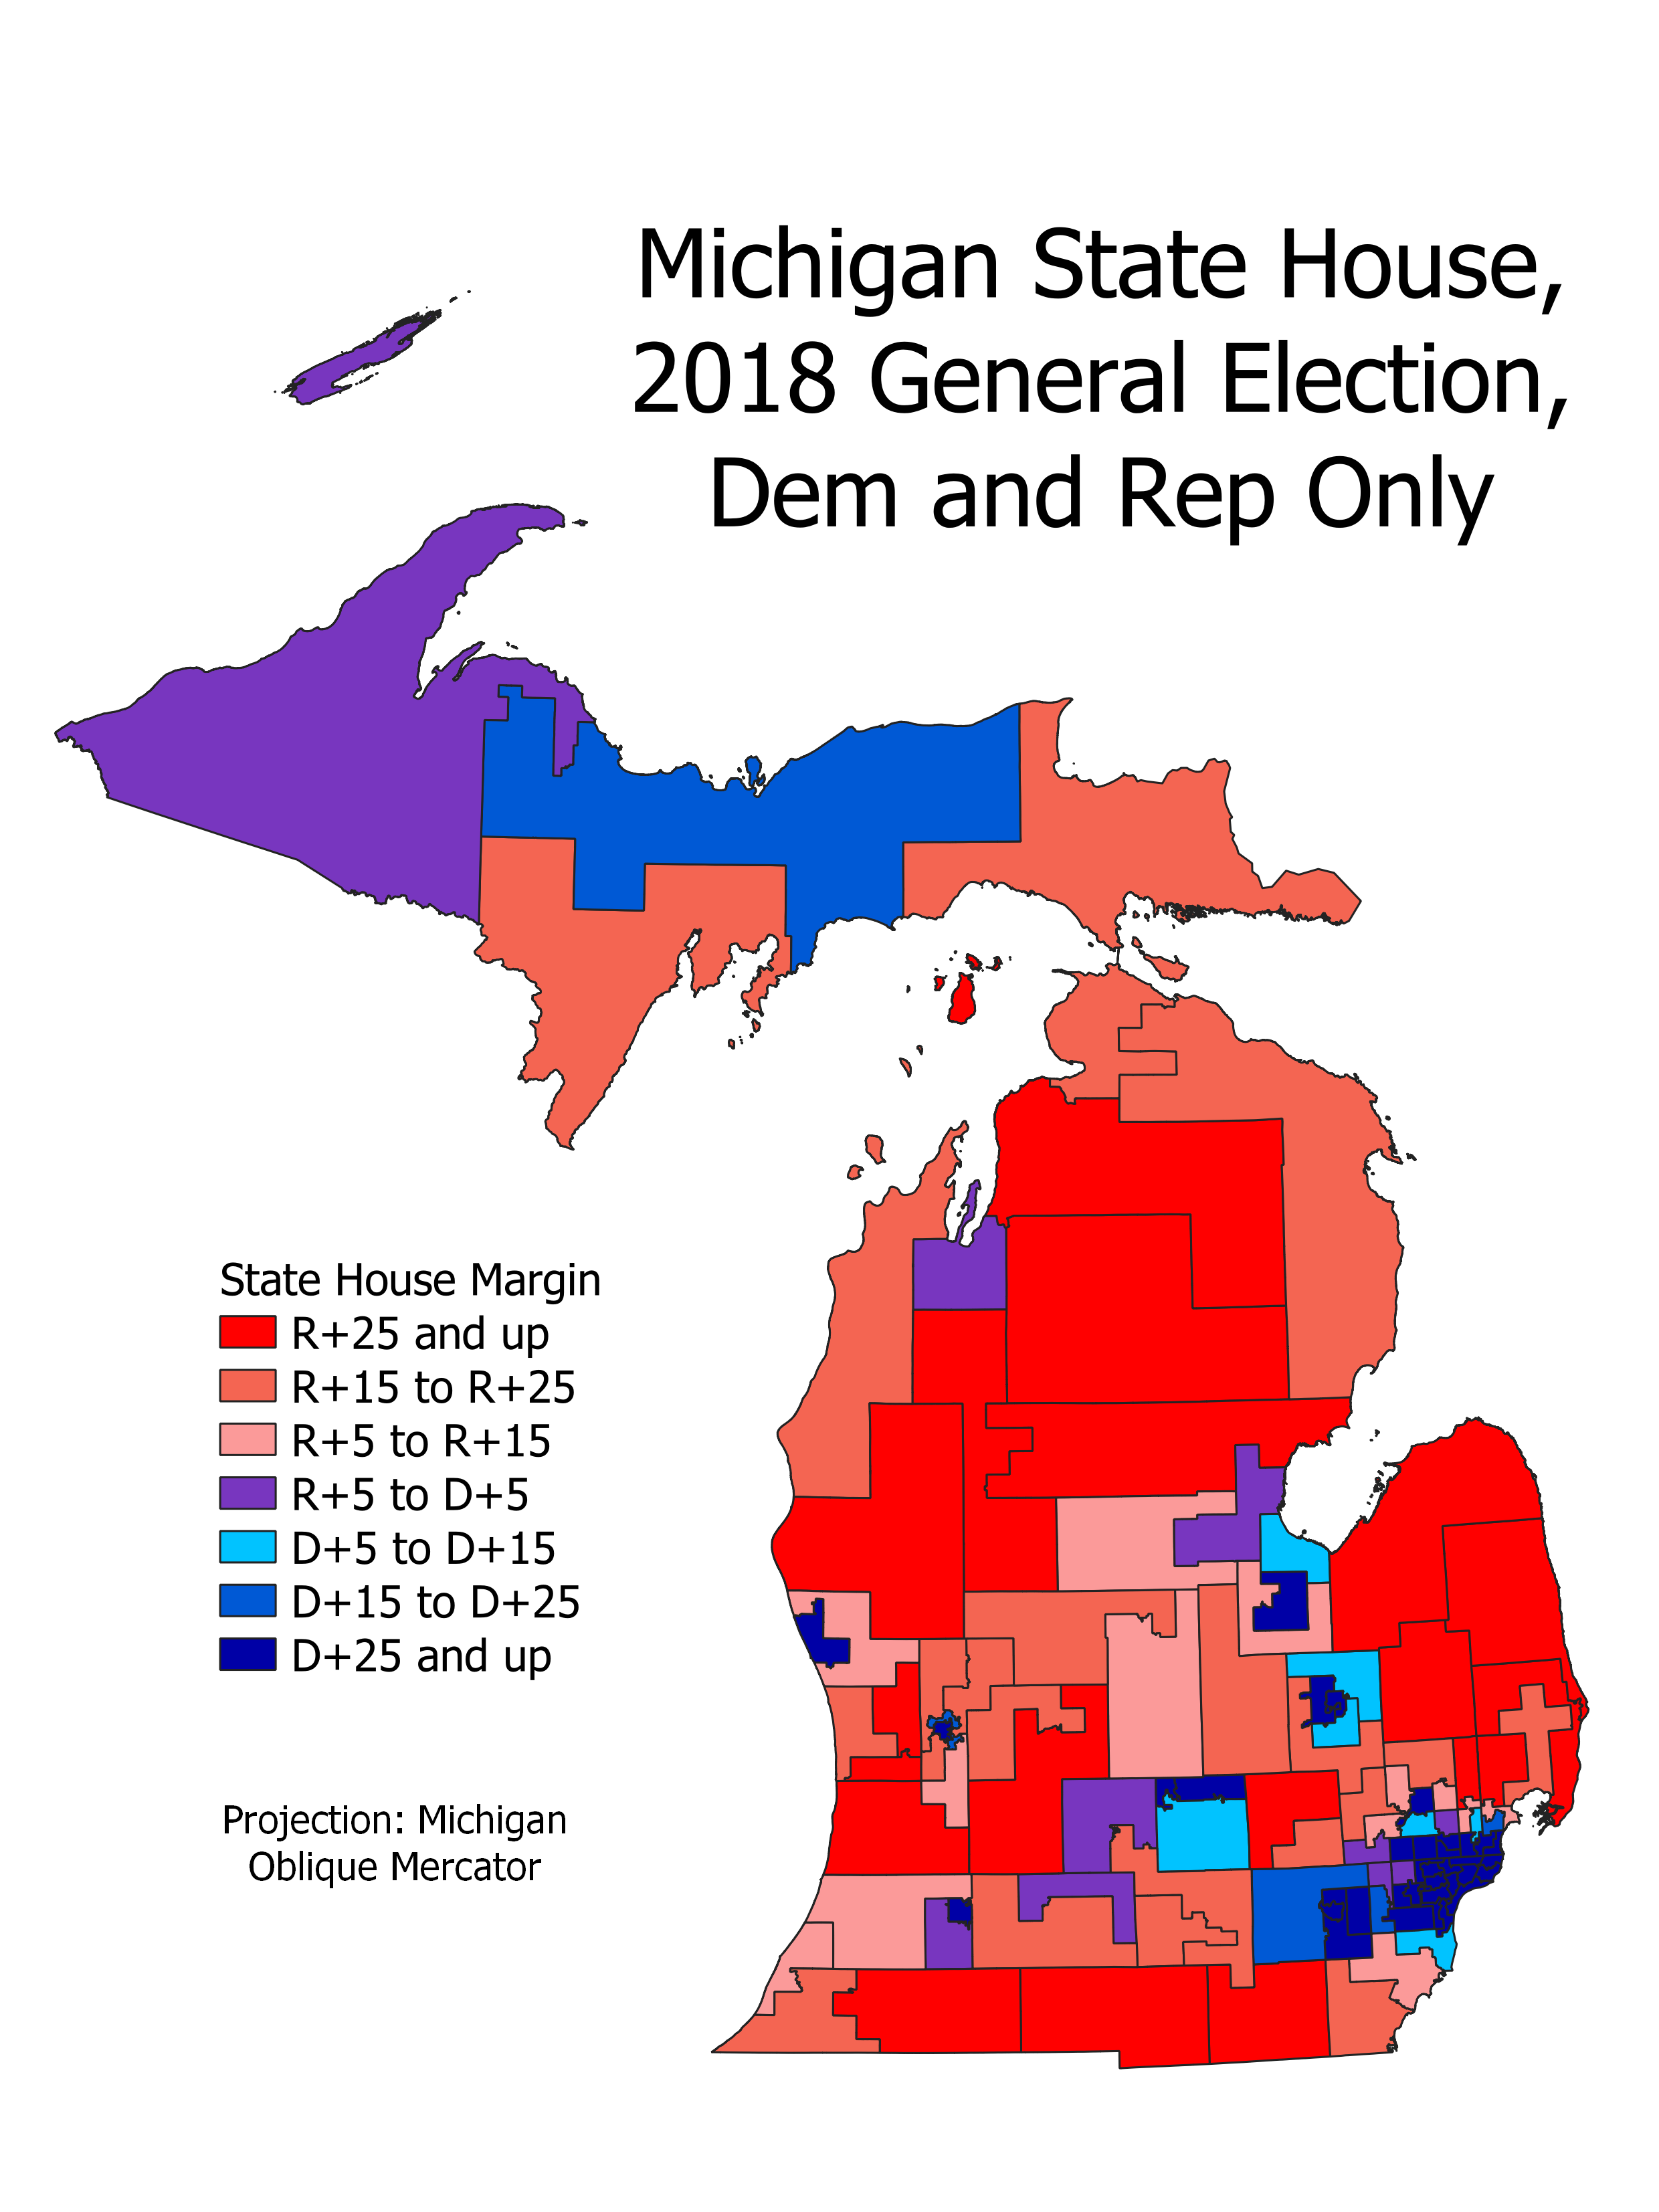

In [65]:
from IPython.display import Image
Image(filename='Layouts/HouseDistricts.png')